In [155]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import irtemp
import edge_detection as ed
import pixel_analysis as pa

## PART A:
### The temperature profile of the samples and plate is determined by detecting the edges, filling and labeling them, and monitoring the temperature at their centroids.

#### Use the function 'edge_detection.input_file' to load the input file

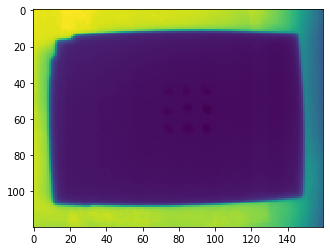

In [156]:
frames = ed.input_file('../musicalrobot/data/10_17_19_PPA_Shallow_plate.tiff')
plt.imshow(frames[0])

#### Crop the input file if required to remove the noise and increase the accuracy of edge detection

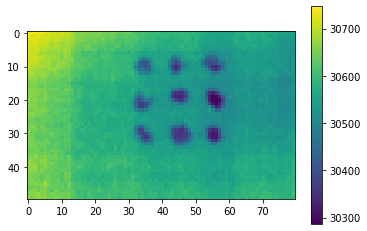

In [157]:
crop_frame = []
for frame in frames:
    crop_frame.append(frame[35:85,40:120])
plt.imshow(crop_frame[0])
plt.colorbar()

#### Use the wrapping function edge_detection.inflection_temp 

In [158]:
# Using the wrapping function
sorted_regprops, s_temp, p_temp, inf_temp, m_df = ed.inflection_temp(crop_frame, 3, 3)

/Users/cheng-yuanwu/Desktop/musical-robot-origin/examples/edge_detection.py:293: RuntimeWarning: invalid value encountered in true_divide
  derivative = gradient[:,1]/gradient[:,0]


In [159]:
sorted_regprops[0]

,Row,Column,Plate_temp(cK),Radius,Plate_coord,Area,Perim,Sample_temp(cK)
unique_index,,,,,,,,
15.0,9.0,34.0,30562.0,2.820948,39.820948,25.0,15.656854,30406.0
80.0,21.0,33.0,30528.0,2.705758,38.705758,23.0,14.828427,30366.0
96.0,30.0,34.0,30544.0,2.931615,39.931615,27.0,17.071068,30376.0
30.0,9.0,43.0,30528.0,2.705758,48.705758,23.0,15.071068,30430.0
73.0,18.0,45.0,30534.0,2.705758,50.705758,23.0,14.828427,30350.0
48.0,30.0,45.0,30497.0,3.241022,51.241022,33.0,18.242641,30359.2
84.0,9.0,55.0,30526.0,3.141275,61.141275,31.0,18.485281,30394.4
36.0,19.0,55.0,30526.0,2.985411,60.985411,28.0,17.656854,30291.0
47.0,30.0,55.0,30524.0,2.646284,60.646284,22.0,14.242641,30317.0


# sample temperature by multiple pixel calculation

In [160]:
from scipy.ndimage.morphology import binary_fill_holes
from skimage.measure import label
from skimage.measure import regionprops
from skimage.morphology import remove_small_objects
from skimage import feature
from skimage.draw import circle

In [161]:
for size in range(15, 9, -1):
    for thres in range(1500, 900, -100):
        edges = feature.canny(crop_frame[0]/thres)
        filled_samples = binary_fill_holes(edges)
        cl_samples = remove_small_objects(filled_samples, min_size=size)
        labeled_samples = label(cl_samples)
        props = regionprops(labeled_samples, intensity_image=crop_frame[0])

In [162]:
props = regionprops(labeled_samples, intensity_image=crop_frame[0])
# Initializing arrays for all sample properties obtained from regprops.
row = np.zeros(len(props)).astype(int)
column = np.zeros(len(props)).astype(int)
area = np.zeros(len(props))
radius = np.zeros(len(props))
perim = np.zeros(len(props))
intensity = np.zeros(len(props), dtype=np.float64)
plate = np.zeros(len(props), dtype=np.float64)
plate_coord = np.zeros(len(props))

c = 0
for prop in props:
    row[c] = int(prop.centroid[0])
    column[c] = int(prop.centroid[1])
            # print(y[c])
    area[c] = prop.area
    perim[c] = prop.perimeter
    radius[c] = prop.equivalent_diameter/2
    rr, cc = circle(row[c], column[c], radius = radius[c]/3)
    intensity[c] = np.mean(crop_frame[0][rr,cc])
    plate[c] = crop_frame[0][row[c]][column[c]+int(radius[c])+3]
    plate_coord[c] = column[c]+radius[c]+3
    
    c = c + 1

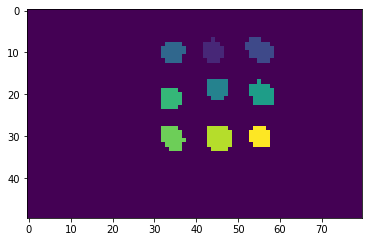

In [163]:
plt.imshow(labeled_samples)

In [164]:
a=[]
for row in range(len(labeled_samples)):
    x=labeled_samples[row]
    get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]
    number=get_indexes(1,x)
    a.append(number)
a

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [44],
 [42, 43, 44, 45],
 [42, 43, 44, 45, 46],
 [42, 43, 44, 45, 46],
 [42, 43, 44, 45, 46],
 [43, 44, 45],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

In [165]:
b=[]
for row in range(len(labeled_samples)):
    o=labeled_samples[row]
    get_indexes = lambda o, os: [i for (y, i) in zip(os, range(len(os))) if o == y]
    root=get_indexes(1,o)
    if root != [] :
        b.append(row)
b
print(np.max(b))
print(np.min(b))

12
7


In [166]:
#remove the empty[]
while [] in a:
    a.remove([])
a

[[44],
 [42, 43, 44, 45],
 [42, 43, 44, 45, 46],
 [42, 43, 44, 45, 46],
 [42, 43, 44, 45, 46],
 [43, 44, 45]]

In [167]:
new_data1=[]
for i in range(len(a)):
    new_data1.append(min(a[i]))
print(min(new_data1))
  

42


In [168]:
new_data2=[]
for i in range(len(a)):
    new_data2.append(max(a[i]))
print(max(new_data2))
 

46


In [169]:
find_martrix_min_value(a)

42


In [170]:
np.max(b)

12

In [171]:
print("sample1 crop_frame","row from",np.min(b),"to",np.max(b),"column from",min(new_data1)   ,"to",max(new_data2)  )

sample1 crop_frame row from 7 to 12 column from 42 to 46


# get the range of the sample by crop_frame

In [186]:
for sample in range(len(column)):
    a=[]
    for row in range(len(labeled_samples)):
        x=labeled_samples[row]
        get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]
        number=get_indexes(sample+1,x)
        a.append(number)
        while [] in a:
            a.remove([])
        
        new_data1=[]
        for i in range(len(a)):
            new_data1.append(min(a[i]))
        
        new_data2=[]
        for i in range(len(a)):
            new_data2.append(max(a[i]))
    b=[]
    for row in range(len(labeled_samples)):
        o=labeled_samples[row]
        get_indexes = lambda o, os: [i for (y, i) in zip(os, range(len(os))) if o == y]
        root=get_indexes(sample+1,o)
        if root != [] :
            b.append(row)
    print("sample",sample+1,"row:from",np.min(b),"to",np.max(b),'  ',
          "column:from",min(new_data1)   ,"to",max(new_data2)  )

    

sample 1 row:from 7 to 12    column:from 42 to 46
sample 2 row:from 7 to 12    column:from 52 to 58
sample 3 row:from 8 to 12    column:from 32 to 37
sample 4 row:from 17 to 21    column:from 43 to 47
sample 5 row:from 17 to 22    column:from 53 to 58
sample 6 row:from 19 to 23    column:from 32 to 36
sample 7 row:from 28 to 33    column:from 32 to 37
sample 8 row:from 28 to 33    column:from 43 to 48
sample 9 row:from 28 to 32    column:from 53 to 57


In [179]:
for sample in range(len(column)):
    print(sample)

0
1
2
3
4
5
6
7
8


In [172]:
a=[]
for row in range(len(labeled_samples)):
    x=labeled_samples[row].tolist()
    get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]
    number=np.sum(crop_frame[0][row][get_indexes(1,x)])
    a.append(number)
a

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 30491,
 121851,
 152224,
 152070,
 152208,
 91402,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [173]:
a=[]
for row in range(len(labeled_samples)):
    x=labeled_samples[row].tolist()
    get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]
    number=np.sum(crop_frame[0][row][get_indexes(1,x)])
    a.append(number)
final_sum=np.sum(a)
result = final_sum/area[0]

In [174]:
for dot in range(len(column)):
    a[dot+1]=[]
    for row in range(len(labeled_samples)):
        x=labeled_samples[row].tolist()
        get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]
        number=np.sum(crop_frame[0][row][get_indexes(dot+1,x)])
        a[dot+1].append(number)
    final_sum=np.sum(a[dot+1])
    result = final_sum/area[dot]
    print("sample", dot+1, result )

sample 1 30445.478260869564
sample 2 30430.129032258064
sample 3 30469.32
sample 4 30405.91304347826
sample 5 30367.071428571428
sample 6 30441.130434782608
sample 7 30449.703703703704
sample 8 30409.969696969696
sample 9 30385.545454545456


#### Plotting the locations at which the temperature was recorded

Text(0.5, 1.0, 'Sample centroid and plate locations at which the temperature profile is monitored')

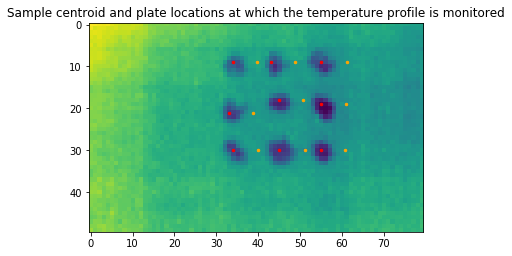

In [11]:
# Plotting the original image with the samples
# and centroid and plate location
plt.imshow(crop_frame[0])
plt.scatter(sorted_regprops[0]['Plate_coord'],sorted_regprops[0]['Row'],c='orange',s=6)
plt.scatter(sorted_regprops[0]['Column'],sorted_regprops[0]['Row'],s=6,c='red')#the origin location of the samples
plt.title('Sample centroid and plate locations at which the temperature profile is monitored')

Text(0.5, 1.0, 'Temperature of the sample against the temperature of the plate')

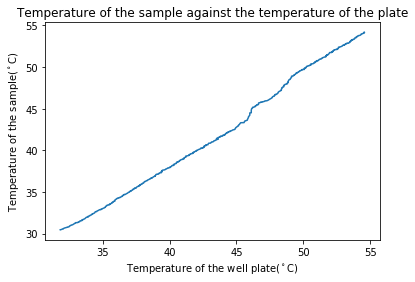

In [12]:
# Plotting the temperature profile of a sample against the temperature profile
# of the plate at a location next to the sample.
plt.plot(p_temp[5],s_temp[5])
plt.ylabel('Temperature of the sample($^\circ$C)')
plt.xlabel('Temperature of the well plate($^\circ$C)')
plt.title('Temperature of the sample against the temperature of the plate')

## Part B:
* The temperature profile of the samples and the plate is obtained by summing the pixel values over individual rows and columns, finding the troughs in the array of all the column and row sums.
* The temperature profile is then obtained by monitoring the temperature value at the intersection of peak values in the column and row sums. 

#### Load the input file as frames

#### Use the function irtemp.pixel_temp to get the temperature of the samples and at plate locations next to the samples in every frame of the input video.

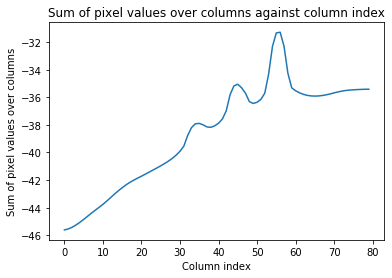

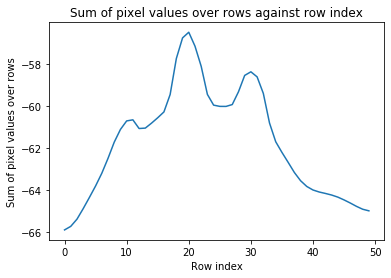

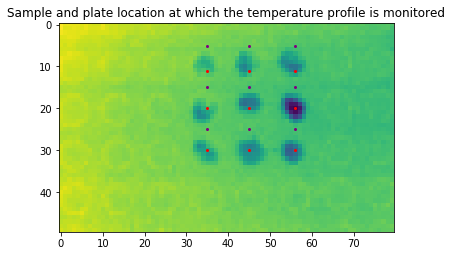

In [13]:
m_df = pa.pixel_temp(crop_frame,len(crop_frame),n_columns = 3, n_rows = 3)